<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/apply_applymap_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [287]:
# https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff

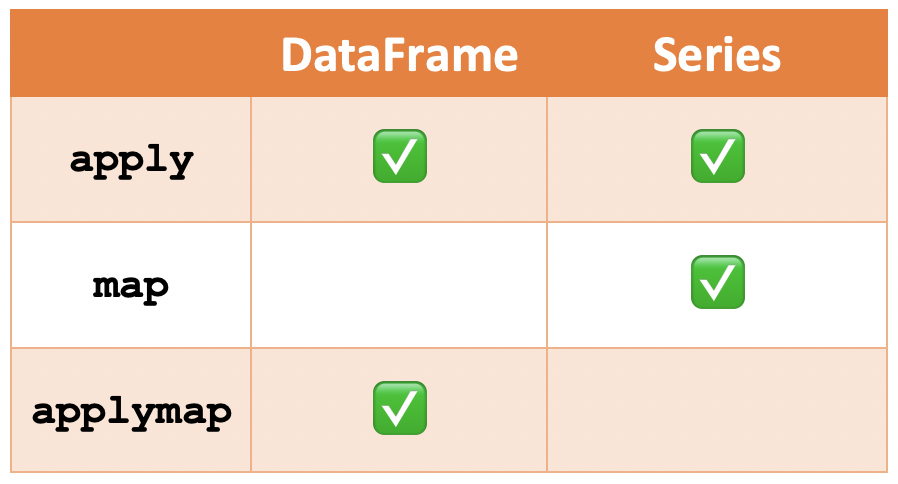

## **Dataset for demonstration**

In [288]:
import pandas as pd
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


# **apply( )**

The Pandas apply( ) is used to apply a function along an axis of the DataFrame or on values of Series.

## **Sumowanie po wierszach**

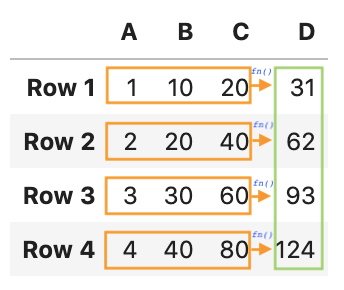

In [289]:
df['D'] = df.apply(lambda x: x.sum(), axis=1)
df

,A,B,C,D
Row 1,1,10,20,31
Row 2,2,20,40,62
Row 3,3,30,60,93
Row 4,4,40,80,124


## **Sumowanie po kolumnach**

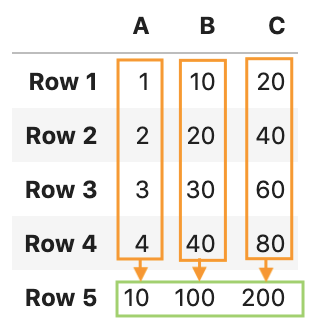

In [290]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


In [291]:
df.loc['Row 5'] = df.apply(lambda x: x.sum(), axis=0)
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80
Row 5,10,100,200


## **Mnożenie jednej kolumny przez liczbę**

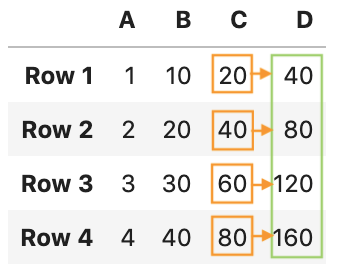

In [292]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


In [293]:
# Nie można axis=1, bo apply działa na jednej kolumnie którą jest jednowymiarowa Series
df['D'] = df['C'].apply(lambda x: x*2)
df

,A,B,C,D
Row 1,1,10,20,40
Row 2,2,20,40,80
Row 3,3,30,60,120
Row 4,4,40,80,160


## **Parametr result_type**

result_type is a parameter in apply( ) set to 'expand', 'reduce', or 'broadcast' to get the desired type of result. Default is None

### **result_type=broadcast**

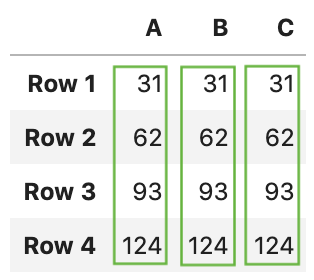

In [294]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


In [295]:
# kolumnę wyniku apply wstawia w każdą istniejącą kolumnę
df = df.apply(lambda x: x.sum(), axis=1, result_type='broadcast')
df

,A,B,C
Row 1,31,31,31
Row 2,62,62,62
Row 3,93,93,93
Row 4,124,124,124


### **result_type=expand**

In [296]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


In [297]:
df_nowa = df.apply(lambda x: [x['A'] * 2, x['B'] * 3], axis=1, result_type='expand')
df_nowa

,0,1
Row 1,2,30
Row 2,4,60
Row 3,6,90
Row 4,8,120


In [298]:
# dorzucam df_nowa do istniejącej df
df[df_nowa.columns] = df_nowa
df

,A,B,C,0,1
Row 1,1,10,20,2,30
Row 2,2,20,40,4,60
Row 3,3,30,60,6,90
Row 4,4,40,80,8,120


### **result_type=reduce**

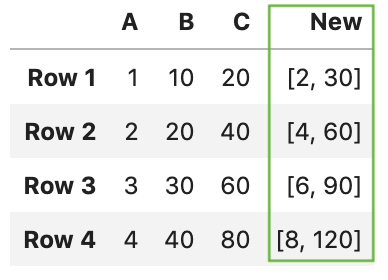

In [299]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])
df

,A,B,C
Row 1,1,10,20
Row 2,2,20,40
Row 3,3,30,60
Row 4,4,40,80


In [300]:
df['New'] = df.apply(lambda x: [x['A'] * 2, x['B'] * 3], axis=1, result_type='reduce')
df

,A,B,C,New
Row 1,1,10,20,"[2, 30]"
Row 2,2,20,40,"[4, 60]"
Row 3,3,30,60,"[6, 90]"
Row 4,4,40,80,"[8, 120]"


# **applymap( )**

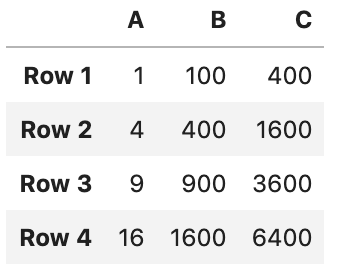

In [301]:
# od nowa tworzę df
df = pd.DataFrame({'A': [1,2,3,4], 
                   'B': [10,20,30,40],
                   'C': [20,40,60,80]
                  }, 
                  index=['Row 1', 'Row 2', 'Row 3', 'Row 4'])

In [302]:
import numpy as np

# applymap działa na każdy element z df
df = df.applymap(np.square)
df

,A,B,C
Row 1,1,100,400
Row 2,4,400,1600
Row 3,9,900,3600
Row 4,16,1600,6400


# **map( )**

In [303]:
s = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
s

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [304]:
# ignoruje NaN
s = s.map('I am a {}'.format, na_action='ignore')
s

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

# **Podsumowanie**

For DataFrame:

* apply(): It is used when you want to apply a function along the row or column. axis = 0 for column and axis = 1 
for row.

* applymap(): It is used for element-wise operation across the whole DataFrame.

For Series:

* apply(): It is used when you want to apply a function on the values of Series.

* map(): It is used to substitute each value with another value.